In [1]:
from zipline.api import order_target_percent, record, symbol, schedule_function, date_rules, order
from zipline.api import set_commission, commission, set_slippage, slippage
from zipline import run_algorithm
from zipline.utils.events import time_rules

import pandas as pd
import numpy as np

import requests
from datetime import datetime
from zipline.api import set_commission, set_slippage
from zipline.finance.commission import PerShare, PerDollar
from zipline.finance.slippage import VolumeShareSlippage

In [2]:
RETS_FILE_PATH = 'historical_returns.csv'

In [3]:
def get_weights_for_date(date):
  
    # The base URL of your Flask application
    base_url = "http://localhost:5000/get_weights"
    
    # Prepare the query parameters
    params = {'date': str(date)}
    
    try:
        # Sending a GET request to the endpoint
        response = requests.get(base_url, params=params)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()
            return data.get('weights')
        else:
            # Handle possible errors (e.g., invalid date format, missing date parameter)
            print(f"Error: {response.json()['error']}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [92]:
# Define the initialize function
def initialize(context):

        # Set the commission model
    set_commission(PerDollar(cost=0.0001))
    #set_commission(PerDollar(cost=0))
    
    # Set the slippage model
    # VolumeShareSlippage takes 'volume_limit' and 'price_impact' as parameters
    # 'volume_limit' is the fraction of a bar's volume that your order can take up
    # 'price_impact' is the impact your order has on the price per share for each share traded
    #set_slippage(VolumeShareSlippage(volume_limit=0.025, price_impact=0.01))
    
    # Slippage model: Assuming 0.05% slippage per trade
    #set_slippage(slippage.VolumeShareSlippage(volume_limit=0.025, price_impact=0.0005))

    
    context.tickers = ['VWO', 'SPY', 'VNQ', 'LQD', 'DBC']
    context.assets = [symbol(ticker) for ticker in context.tickers]
    
    # Schedule the rebalance function to run every Monday at market open
    schedule_function(rebalance, date_rules.week_start(), time_rules.market_open())
    # Set the context attributes needed
    context.lookback_days = 50 # look back over 50 days for the moving average

# Define the rebalance function
def rebalance(context, data):
    #print(context.get_datetime().date())
     
    # Get historical data for the assets
    historical_data = data.history(context.assets, "price", context.lookback_days + 1, "1d")
    
#     # Calculate daily returns
    daily_returns = historical_data.pct_change().dropna()
    daily_returns.to_csv(RETS_FILE_PATH)
    current_date = context.get_datetime().date()
    
    print(f'Handling {current_date}')
    
    weights = get_weights_for_date(current_date)
    print(weights)
    
    # Place orders
    for asset, weight in zip(context.assets, weights):
        if data.can_trade(asset):
            order_target_percent(asset, weight)
            #print(f'ordered {asset}: {weight}')
    
    # Record some metrics
    record(weights=weights)

# Define the analyze function (optional)
def analyze(context, perf):
    # Plot portfolio weights over time
    #perf.weights.plot()
    pass

In [93]:
start_date = pd.Timestamp('2017-12-15', tz='UTC')#pd.Timestamp('2020-12-15', tz='UTC')
end_date = pd.Timestamp('2020-12-15', tz='UTC')#pd.Timestamp('2023-12-15', tz='UTC') # 2023

# start_date = pd.Timestamp('2020-12-15', tz='UTC')
# end_date = pd.Timestamp('2023-12-15', tz='UTC') # 202

capital_base = 1e7

perf = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    capital_base=capital_base,
    data_frequency='daily',
    bundle='thesis1' 
)

Handling 2017-12-18
[-0.12066516280174255, 0.4247640073299408, 0.029977327212691307, 0.7508179545402527, -0.08489412814378738]
Handling 2017-12-26


C:\Users\seidm\miniconda3\envs\ml4t\lib\site-packages\empyrical\stats.py:706: RuntimeWarning: invalid value encountered in true_divide
  np.divide(
C:\Users\seidm\miniconda3\envs\ml4t\lib\site-packages\empyrical\stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


[0.15026186406612396, 0.11231150478124619, 0.0314481221139431, 0.6101203560829163, 0.09585816413164139]
Handling 2018-01-02
[-0.10736380517482758, 0.4779982566833496, -0.03258505091071129, 0.5234894752502441, 0.1384611427783966]
Handling 2018-01-08
[-0.03329344093799591, 0.645815908908844, -0.17208071053028107, 0.6852222084999084, -0.12566395103931427]
Handling 2018-01-16
[0.03183230012655258, 0.3928442895412445, -0.07449637353420258, 0.7397199273109436, -0.08990015834569931]
Handling 2018-01-22
[-0.1935211420059204, 0.45557886362075806, -0.024050161242485046, 0.7793494462966919, -0.01735701970756054]
Handling 2018-01-29
[0.08911709487438202, 0.43820562958717346, -0.05406317487359047, 0.44292688369750977, 0.08381355553865433]
Handling 2018-02-05
[0.07535872608423233, 0.20439103245735168, 0.029697610065340996, 0.6512805819511414, 0.03927196189761162]
Handling 2018-02-12
[-0.027927596122026443, 0.025891747325658798, 0.22321340441703796, 0.7115047574043274, 0.06731734424829483]
Handling 2

[-0.13891786336898804, 0.5044074654579163, -0.0427393913269043, 0.5384055972099304, 0.13884420692920685]
Handling 2019-04-01
[-0.15728259086608887, 0.45203325152397156, 0.16068589687347412, 0.5116127133369446, 0.032950710505247116]
Handling 2019-04-08
[-0.06721429526805878, 0.3943943977355957, 0.0032423618249595165, 0.5224112272262573, 0.14716629683971405]
Handling 2019-04-15
[0.05478893965482712, 0.4924675524234772, -0.1934802234172821, 0.5114465355873108, 0.1347772181034088]
Handling 2019-04-22
[0.027766229584813118, 0.23487450182437897, 0.0799216479063034, 0.4880128800868988, 0.16942474246025085]
Handling 2019-04-29
[-0.11370012909173965, 0.33469176292419434, -0.039223797619342804, 0.7162702083587646, 0.1019619032740593]
Handling 2019-05-06
[0.04082835465669632, 0.3363308608531952, -0.00941616389900446, 0.5613396167755127, 0.0709172859787941]
Handling 2019-05-13
[-0.11450088769197464, 0.42391976714134216, 0.08182719349861145, 0.5327605605125427, 0.07599327713251114]
Handling 2019-05

[0.1708030104637146, 0.1626468300819397, -0.023615745827555656, 0.5435298085212708, 0.14663581550121307]
Handling 2020-07-06
[-0.26287609338760376, 0.4006650447845459, 0.06833682209253311, 0.4708099067211151, 0.32306423783302307]
Handling 2020-07-13
[-0.07410739362239838, 0.39360737800598145, 0.10880380123853683, 0.6827005743980408, -0.11100443452596664]
Handling 2020-07-20
[0.016168739646673203, 0.4534919559955597, -0.11635008454322815, 0.5370431542396545, 0.10964613407850266]
Handling 2020-07-27
[-0.16193780303001404, 0.17799176275730133, 0.26307401061058044, 0.577133297920227, 0.14373865723609924]
Handling 2020-08-03
[-0.11337359249591827, 0.5612383484840393, 0.09839124232530594, 0.6482887864112854, -0.19454483687877655]
Handling 2020-08-10
[-0.03652140498161316, 0.3730047941207886, -0.13672244548797607, 0.622856855392456, 0.17738217115402222]
Handling 2020-08-17
[0.005445840768516064, 0.5507497787475586, -0.03474519029259682, 0.4718109667301178, 0.006738596595823765]
Handling 2020-

In [9]:
tmp_perf = perf.copy()

## Save the result

In [95]:
PERF_NAME = 'dense_min_var_with_C'
perf.to_csv(fr'..\analytics\perfs\old\{PERF_NAME}_perf.csv')

# Analytics

In [ ]:
# mean_returns: -0.00022047444443614898
# std: 0.006793907584478022
# Cumulative Returns: -0.1673630146755024
# Annualized Returns: -0.05907459961792738
# Sharpe Ratio: -0.5131137893372564
# Max Drawdown: -0.2874978151290583

In [94]:
## Sharpe Ratio: 5.319768807195642

import empyrical as ep

# Assuming 'perf' is your DataFrame and it has a 'returns' column

# Cumulative returns
cumulative_returns = ep.cum_returns_final(perf['returns'])

# Annualized returns
annualized_returns = ep.annual_return(perf['returns'])

# Sharpe ratio
sharpe_ratio = ep.sharpe_ratio(perf['returns'])

# Max drawdown
max_drawdown = ep.max_drawdown(perf['returns'])

print(f"mean_returns: {perf[perf['returns'] != 0]['returns'].mean()}")
print(f"std: {perf[perf['returns'] != 0]['returns'].std()}")

print(f"Cumulative Returns: {cumulative_returns}")
print(f"Annualized Returns: {annualized_returns}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown}")

#-Sharpe Ratio: -1.9816714432107772 min_var_0 <-1 
#-Sharpe Ratio:min_var_0_retrained_1 0.8404620281481847 min_var_0_retrained_1

mean_returns: 0.00018443646211426814
std: 0.007655227374121521
Cumulative Returns: 0.12382019403183842
Annualized Returns: 0.039731799090617415
Sharpe Ratio: 0.3819560572089945
Max Drawdown: -0.2360925264088735


In [ ]:
tmp = [perf['weights'][i][1] for i in range(4, len(perf['weights']))]
tmp = np.array(tmp)
tmp[tmp > 1]

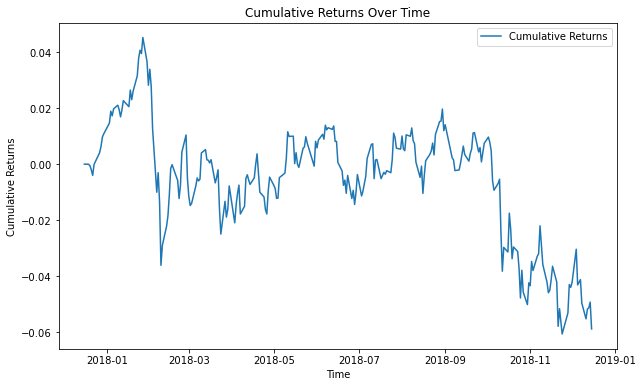

In [26]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

perf['cumulative_returns'] = (1 + perf['returns']).cumprod() - 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(perf['cumulative_returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [ ]:
perf['weights']

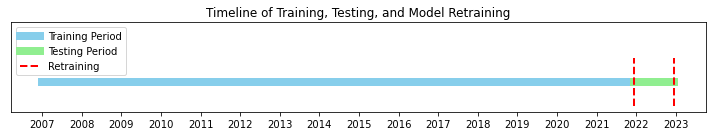

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Define the dates
start_date = datetime(2007, 1, 3)
retraining_dates = [datetime(2021, 12, 15), datetime(2022, 12, 15)]
test_start_date = datetime(2021, 12, 15)
end_date = datetime(2022, 12, 15)

# Plotting
fig, ax = plt.subplots(figsize=(10, 2))

# Highlight the training period
ax.plot([start_date, test_start_date], [1, 1], color="skyblue", linewidth=8, label='Training Period')

# Highlight the testing period
ax.plot([test_start_date, end_date], [1, 1], color="lightgreen", linewidth=8, label='Testing Period')

# Mark the retraining dates
for date in retraining_dates:
    plt.plot([date, date], [0.8, 1.2], color="red", linestyle='--', linewidth=2)

# Adding annotations for retraining dates
for date in retraining_dates:
    ax.text(date, 1.25, '', ha='center', color='red')

# Adjust the plot
ax.set_ylim(0.75, 1.5)
ax.yaxis.set_visible(False)  # Hide the y-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adding labels and title
plt.title('Timeline of Training, Testing, and Model Retraining')

# Adding custom legend
handles, labels = ax.get_legend_handles_labels()
custom_lines = [plt.Line2D([0], [0], color="skyblue", lw=8),
                plt.Line2D([0], [0], color="lightgreen", lw=8),
                plt.Line2D([0], [0], color="red", linestyle='--', lw=2)]
plt.legend(custom_lines, ['Training Period', 'Testing Period', 'Retraining'])

plt.tight_layout()
plt.show()
